In [1]:
import pandas as pd
import numpy as np

In [4]:
# Loading the dataset 
data = pd.read_csv('housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
# Checking the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# Very few rows with null value. So we will drop those rows
data.dropna(inplace=True) 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

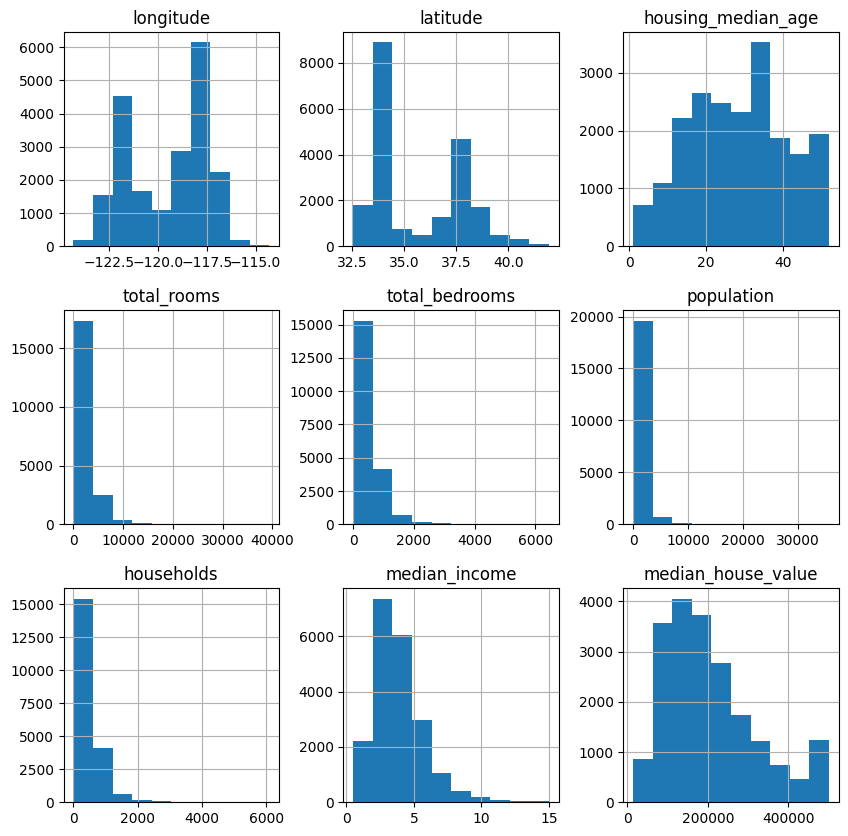

In [19]:
# Lets visualize the data
data.hist(figsize=(10,10))

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

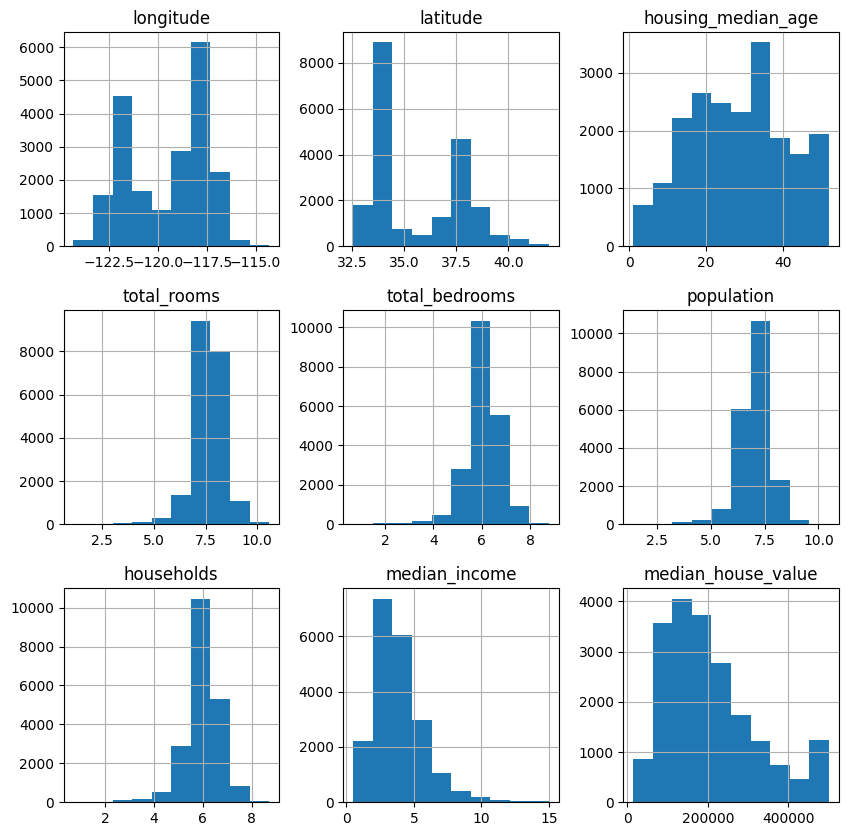

In [20]:
# We see that some of the data is skewed. So we try taking log to see if we get kind of a gaussian curve
data['total_rooms'] = np.log(data['total_rooms']+1)
data['total_bedrooms'] = np.log(data['total_bedrooms']+1)
data['population'] = np.log(data['population']+1)
data['households'] = np.log(data['households']+1)
data.hist(figsize=(10,10))

<Axes: >

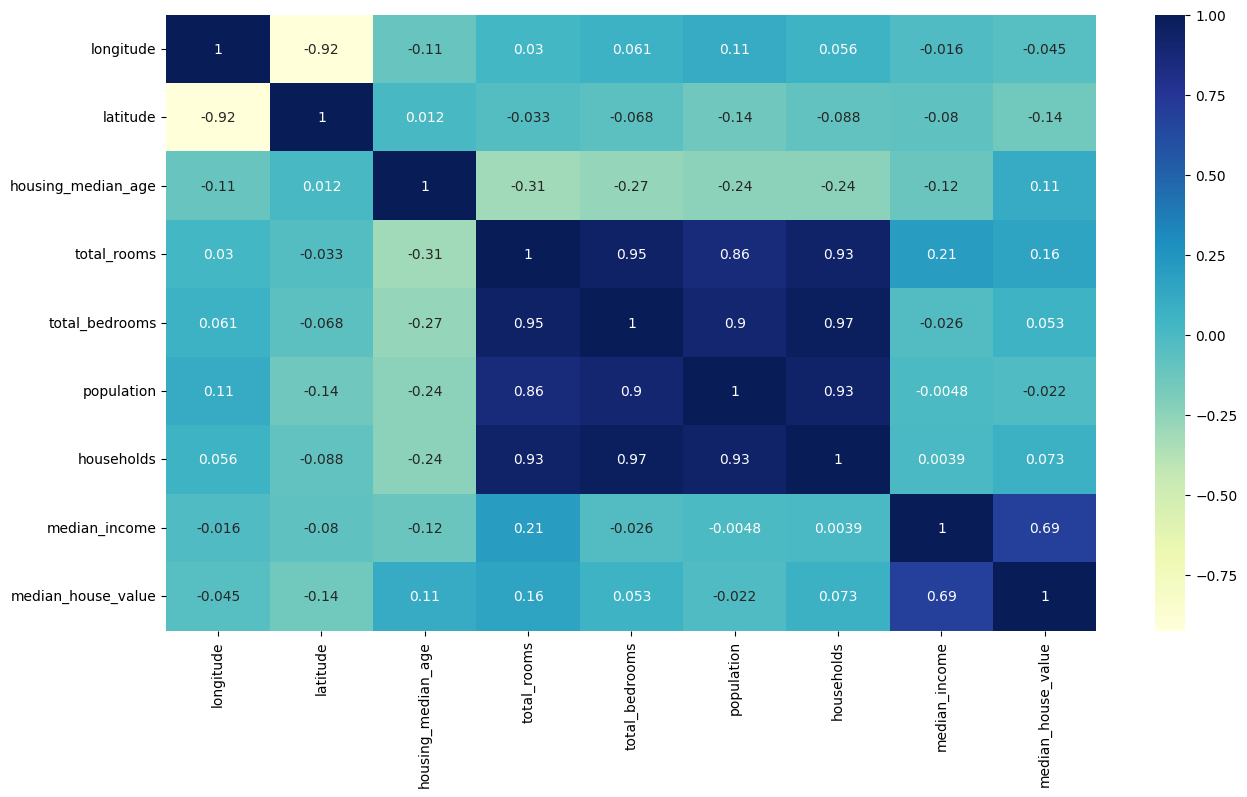

In [21]:
# We can use a heatmap to check how y depends on different features
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')

In [22]:
# Since ocean_proximity has no data values, we use its text values to create new features
new_features = pd.get_dummies(data.ocean_proximity)
new_features

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [23]:
# We can now join this to the original dataset and remove the ocean_proximity feature altogther
data = data.join(new_features).drop(['ocean_proximity'], axis=1)

<Axes: >

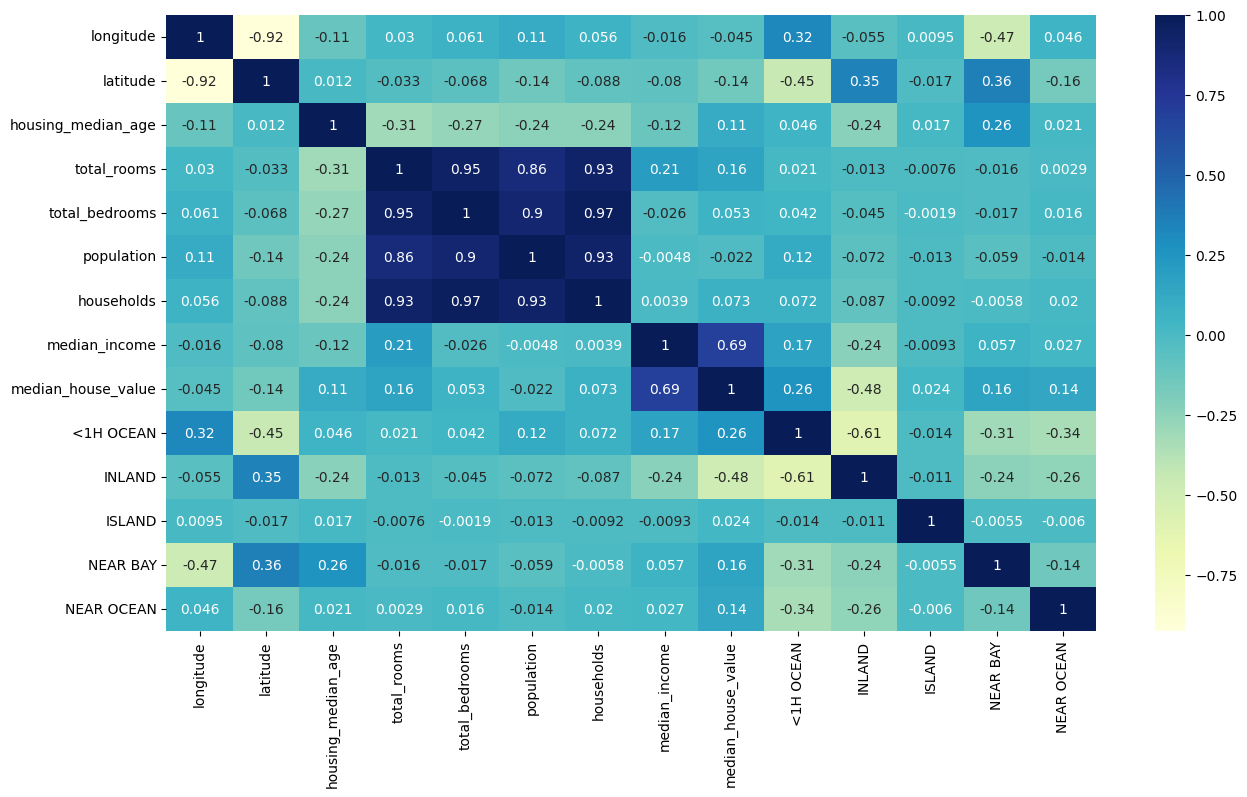

In [24]:
# We check the correlation of y on the new features created
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')

In [26]:
# We divide the data into features(X) and output(y)
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [38]:
# Now we will split our dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

We use fit_transform on our training data to learn the mean and variance and then scale it. We do not use fit_transform for our testing data as we want it to be scaled using the same mean and variance calculated above.

In [71]:
# We scale our features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

The 1st Algorithm we will apply is Linear Regression

In [72]:
# We train our model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(scaled_X_train, y_train)

LinearRegression()

In [74]:
# We test how well our model performs on the test set 
reg.score(scaled_X_test, y_test)

0.6460956799043163

In [75]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(scaled_X_train, y_train)

RandomForestRegressor()

In [76]:
forest.score(scaled_X_test, y_test)

0.8214558230295848

In [85]:
from sklearn.model_selection import GridSearchCV
forest = RandomForestRegressor()
param_grid = {
    "n_estimators":[100, 200, 300],
    "min_samples_split":[2, 4]
}
grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(scaled_X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [86]:
best_forest = grid_search.best_estimator_


In [87]:
best_forest.score(scaled_X_test, y_test)

0.8226294027887724